In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45,27.0,31.0,NaN
1,85,NaN,59,32.0,23.0,0.0
2,86,54.0,33,16.0,54.0,NaN
3,91,78.0,34,24.0,36.0,0.0
4,98,55.0,13,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54.0,25,22.0,35.0,4.0
341,89,48.0,32,22.0,14.0,4.0
342,85,52.0,22,23.0,34.0,4.0
343,95,NaN,21,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	17
int64		column 3	0
float64		column 4	18
float64		column 5	51
float64		column 6	17


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,328.000000,345.000000,327.000000,294.000000,328.000000
mean,90.159420,69.731707,30.405797,24.376147,38.962585,3.411585
std,4.448096,17.984396,19.512309,9.427270,40.119812,3.263849
min,65.000000,23.000000,4.000000,8.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,16.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,26.000000,3.000000
75%,93.000000,79.000000,34.000000,27.000000,43.750000,5.000000
max,103.000000,138.000000,155.000000,78.000000,297.000000,20.000000


<AxesSubplot:>

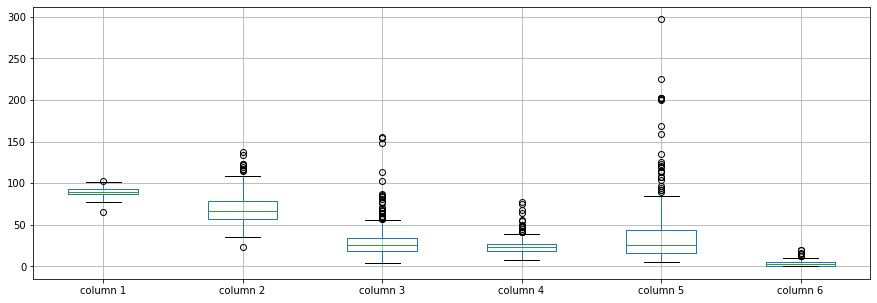

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:

df.mean()

column 1    90.159420
column 2    69.731707
column 3    30.405797
column 4    24.376147
column 5    38.962585
column 6     3.411585
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.034857,0.147695,0.159742,0.218034,0.304509
column 2,0.034857,1.000000,0.068964,0.166948,0.130903,0.084061
column 3,0.147695,0.068964,1.000000,0.701445,0.483214,0.243116
column 4,0.159742,0.166948,0.701445,1.000000,0.544583,0.283229
column 5,0.218034,0.130903,0.483214,0.544583,1.000000,0.378806
column 6,0.304509,0.084061,0.243116,0.283229,0.378806,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+46,6+46+46,6+46+46+46,6+46+46+46+46,6+46+46+46,6+46+46,6+46,6], vae_layer = False, seed = 460)
imputer.build_model(df)
imputer.train_model(training_epochs=46)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 268.8606981549944
Epoch: 1 , loss: 269.0365615118118
Epoch: 2 , loss: 268.31425403413317
Epoch: 3 , loss: 268.2464548746745
Epoch: 4 , loss: 269.8048829578218
Epoch: 5 , loss: 267.9625738234747
Epoch: 6 , loss: 267.44263421921505
Epoch: 7 , loss: 266.26970854259673
Epoch: 8 , loss: 267.14615667433964
Epoch: 9 , loss: 267.1807396298363
Epoch: 10 , loss: 268.21534220377606
Epoch: 11 , loss: 268.3871365501767
Epoch: 12 , loss: 266.49857366652714
Epoch: 13 , loss: 265.5153132847377
Epoch: 14 , loss: 268.6272183372861
Epoch: 15 , loss: 266.3845483689081
Epoch: 16 , loss: 268.02850269135973
Epoch: 17 , loss: 267.4945613316127
Epoch: 18 , loss: 266.8202943347749
Epoch: 19 , loss: 266.2004605247861
Epoch: 20 , loss: 266.2786000569661
Epoch: 21 , loss: 265.19033886137464
Epoch: 22 , loss: 261.34713599795384
Epoch: 23 , loss: 254.32396806989397
Epoch: 24 , loss: 240.34850856236048
Epoch: 25 , loss: 218.9524434407

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    72.669785
column 3    28.000000
column 4    15.000000
column 5    18.000000
column 6     0.500000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0.000000,0,0.0,0.0,2.653014
1,0,-45.419037,0,0.0,0.0,0.000000
2,0,0.000000,0,0.0,0.0,0.015938
3,0,0.000000,0,0.0,0.0,0.000000
4,0,0.000000,0,0.0,0.0,0.000000
...,...,...,...,...,...,...
340,0,0.000000,0,0.0,0.0,0.000000
341,0,0.000000,0,0.0,0.0,0.000000
342,0,0.000000,0,0.0,0.0,0.000000
343,0,-65.217791,0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

390.4234842412993

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [20]:
NRMS=numerator/denominator
NRMS


0.15494458206569242

In [21]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.000000,45,27.0,31.0,2.653014
1,85,18.580963,59,32.0,23.0,0.000000
2,86,54.000000,33,16.0,54.0,0.015938
3,91,78.000000,34,24.0,36.0,0.000000
4,98,55.000000,13,17.0,17.0,0.000000
...,...,...,...,...,...,...
340,91,54.000000,25,22.0,35.0,4.000000
341,89,48.000000,32,22.0,14.0,4.000000
342,85,52.000000,22,23.0,34.0,4.000000
343,95,27.782209,21,27.0,47.0,6.000000


In [23]:
imputations[-1].to_excel("Bupa_NW_5(imp).xlsx", index=False, header=False)